# Pymaceuticals Inc.
---

### Analysis

There is a correlation between the weight of the mice and existing tumors present in those same mice.
The best two treatments for the tumors were Capomulin and Ramicane.
Of the two treatments Capomulin seemed most effective in treating the tumors over a longer period of days.
We can conclude that mice using Capomulin and that are on a healthier diet will have the least amount of tumors.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice=merged_data["Mouse ID"].value_counts()
mice_number=len(mice)
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df=merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid_df=merged_data.loc[merged_data["Mouse ID"]=="g989", :]
duplicate_mouseid_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=merged_data[merged_data['Mouse ID'].isin(duplicate_df)==False]
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaner_df=clean_dataframe["Mouse ID"].value_counts()
cleanest_df=len(cleaner_df)
cleanest_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean=clean_dataframe.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=clean_dataframe.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_dataframe.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev=clean_dataframe.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem=clean_dataframe.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary=pd.DataFrame({"Mean Vol of Tumors": mean,
                      "Median Vol of Tumors": median,
                      "Varaince Vol of Tumors": variance,
                      "Std Dev Vol of Tumors": std_dev,
                      "Std. Error Vol of Tumors": sem})

summary

,Mean Vol of Tumors,Median Vol of Tumors,Varaince Vol of Tumors,Std Dev Vol of Tumors,Std. Error Vol of Tumors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregation_summary=clean_dataframe.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

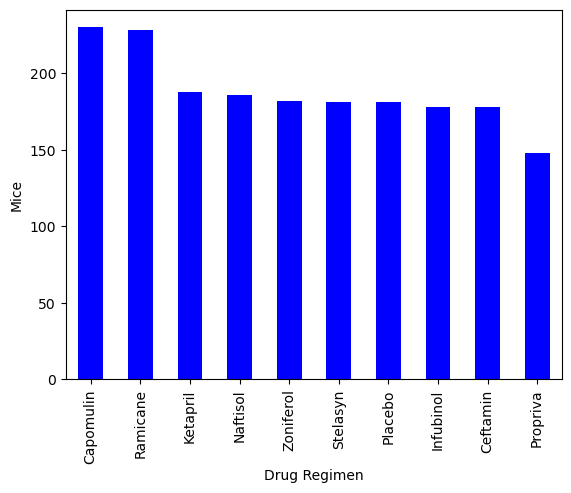

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
all_mice= clean_dataframe["Drug Regimen"].value_counts()
plot_pandas=all_mice.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()

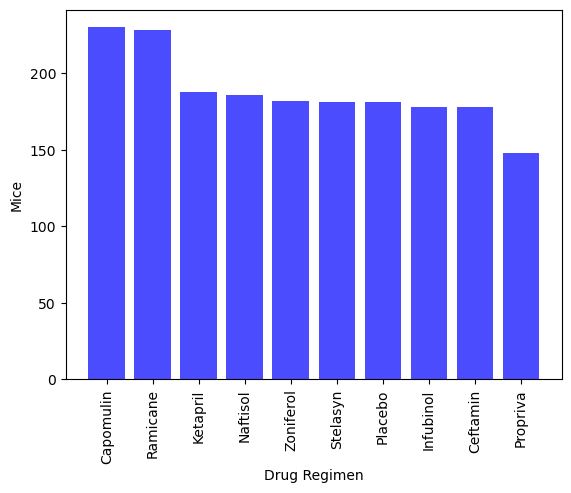

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#Need x and y axis defined
x_axis=all_mice.index.values
y_axis=all_mice.values
plt.bar(x_axis, y_axis, color='blue', alpha=0.7, align='center')
plt.xlabel("Drug Regimen")
#This is the flip the labels vertical for clarity
plt.xticks(rotation='vertical')
plt.ylabel("Mice")
plt.show()

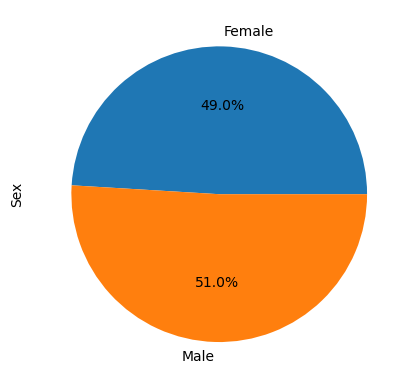

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female=clean_dataframe.groupby(['Sex'])['Sex'].count()
male_vs_female.plot.pie(autopct='%1.1f%%')
plt.show()

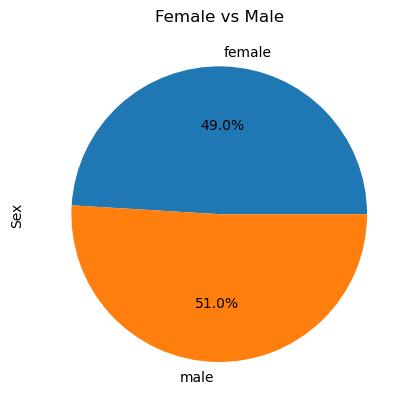

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_vs_female, labels=('female', 'male'), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title("Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
by_mouse = merged_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

new_merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(merged_data,on=['Mouse ID','Timepoint'],how="left")

def the_outliers(regimen):
    reg_data = new_merged_data.loc[new_merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    quartiles = reg_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    outliers = reg_data.loc[(reg_data < lower_bound) | (reg_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return reg_data



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs=merged_data[merged_data["Drug Regimen"].isin(drug_list)]
drugs.head()
timepoint=drugs.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1]))
timepoint=timepoint.stack(level=0).unstack(level=0)
# Create empty list to fill with tumor vol data (for plotting)
cap = the_outliers("Capomulin")
ram = the_outliers("Ramicane")
inf = the_outliers("Infubinol")
ceft = the_outliers("Ceftamin")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
treament=0
for drug in drug_list:
    quartiles=timepoint[drug].quantile([.25,.5,.75]).round(2)
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75].round(2)
    IQR=round(upper_q-lower_q,2)
    lower_bound=round(lower_q-(1.5*IQR),2)
    upper_bound=round(upper_q+(1.5*IQR),2)
    if treament==0:
        print(f"------------------------------------------------------------------")
        print(f"Lower quartile of {drug} treatment equals: {lower_q}")
        print(f"The upper quartile of {drug} treatments is: {upper_q}")
        print(f"The interquartile range of {drug} treatments is: {IQR}")
        print(f"Values below {lower_bound} could be {drug} outliers.")
        print(f"Values above {upper_bound} could be {drug} outliers.")
        print(f"------------------------------------------------------------")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------
Lower quartile of Capomulin treatment equals: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------------
Lower quartile of Ramicane treatment equals: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Valu

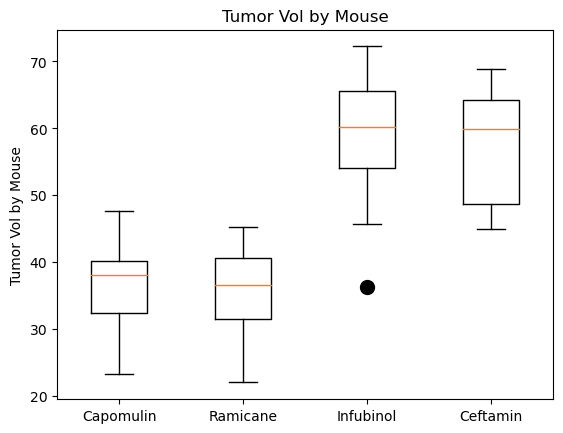

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
black_dot=dict(markerfacecolor="black", markersize=10)
plt.boxplot([cap, ram, inf, ceft], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=black_dot)
plt.title('Tumor Vol by Mouse')
plt.ylabel('Tumor Vol by Mouse')
plt.show()

## Line and Scatter Plots

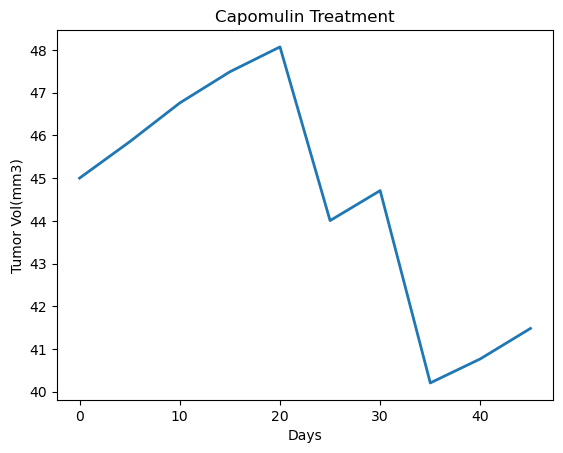

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_scatter_df=clean_dataframe.loc[clean_dataframe["Mouse ID"] == "l509",:]
line_scatter_df
x_axis=line_scatter_df['Timepoint']
size=line_scatter_df['Tumor Volume (mm3)']

fig1,ax1=plt.subplots()
plt.title('Capomulin Treatment')
plt.plot(x_axis, size, linewidth=2, markersize=10)
plt.xlabel('Days')
plt.ylabel('Tumor Vol(mm3)')

plt.show()


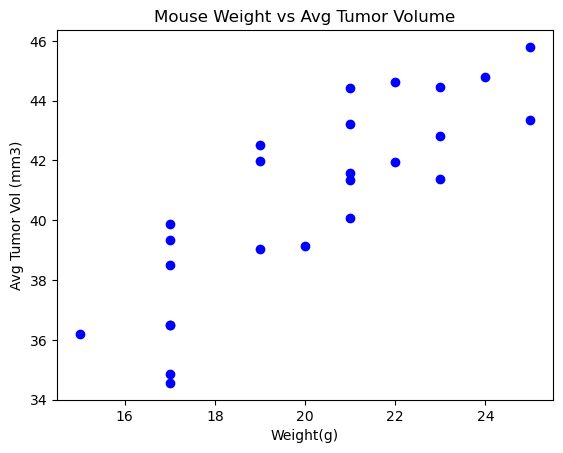

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1=plt.subplots()
cap_df=clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin",:]
scatter_df=cap_df.groupby(['Mouse ID']).mean()

marker=15
plt.scatter(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight(g)')
plt.ylabel('Avg Tumor Vol (mm3)')
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.show()

## Correlation and Regression

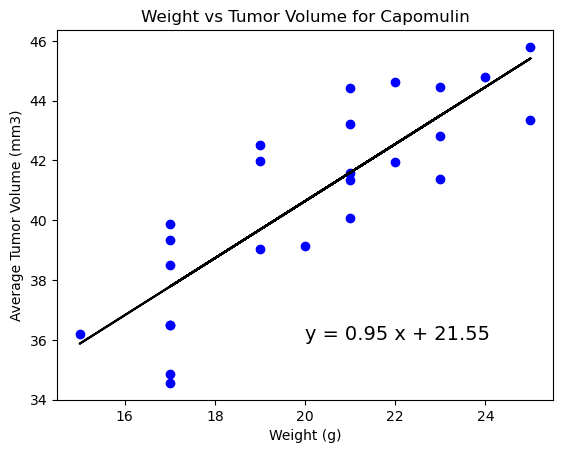

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"])
reg_values=scatter_df["Weight (g)"]* slope + intercept
line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(scatter_df["Weight (g)"],scatter_df["Tumor Volume (mm3)"],color='blue')
plt.plot(scatter_df["Weight (g)"], reg_values, color='black')
plt.annotate(line,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()